# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [16]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple = pd.read_csv(url)

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 3. Assign it to a variable apple

fuck


/var/folders/rz/sgm05zns3nbc3xz2jc3bg2rw0000gn/T/ipykernel_36063/169898939.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  apple = apple.resample(rule="H").sum().drop_duplicates()


Text(0.5, 1.0, 'hello')

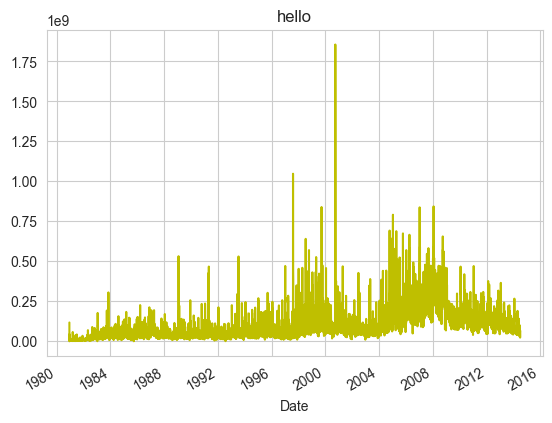

In [40]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple = pd.read_csv(url)
apple.index = pd.to_datetime(apple.Date)
apple = apple.map(lambda x: x if x != 0 else np.nan)
apple = apple.resample(rule="H").sum().drop_duplicates()
if pd.infer_freq(apple.index) == None:
    print("fuck")
else:
    print(pd.infer_freq(apple.index))
sns.set_style("whitegrid")
ax = apple.Volume.plot(kind="line", c = "y")

ax.set_title("hello")




### Step 4.  Check out the type of the columns

In [3]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [4]:
apple.Date = pd.to_datetime(apple.Date)

### Step 6.  Set the date as the index

In [7]:
apple = apple.set_index("Date")

### Step 7.  Is there any duplicate dates?

In [13]:
apple.index.unique()

DatetimeIndex(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02',
               '2014-07-01', '2014-06-30', '2014-06-27', '2014-06-26',
               '2014-06-25', '2014-06-24',
               ...
               '1980-12-26', '1980-12-24', '1980-12-23', '1980-12-22',
               '1980-12-19', '1980-12-18', '1980-12-17', '1980-12-16',
               '1980-12-15', '1980-12-12'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [17]:
apple.sort_index(inplace=True)

### Step 9. Get the last business day of each month

In [23]:
apple.resample("M").last()

/var/folders/rz/sgm05zns3nbc3xz2jc3bg2rw0000gn/T/ipykernel_29544/3136516092.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  apple.resample("M").last()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-31,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-28,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-31,637.98,644.17,628.90,633.00,141005200,90.43


### Step 10.  What is the difference in days between the first day and the oldest

In [28]:
(apple.index.max() - apple.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [40]:
apple.resample("ME")

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-31,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-28,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-31,637.98,644.17,628.90,633.00,141005200,90.43


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [59]:
def my_decorator(func):
    def wrapper(*args, **kwargs):
        print("Decorator received kwargs:", kwargs)
        return func(*args, **kwargs)  # Passing all kwargs, even if some are unused
    return wrapper

@my_decorator
def example_function(a, b=2):
    return f"a: {a}, b: {b}"

# Call the decorated function with extra keyword arguments
some = example_function(1, b=3, extra_arg1="ignored", extra_arg2=42)
print(some)

Decorator received kwargs: {'b': 3, 'extra_arg1': 'ignored', 'extra_arg2': 42}


TypeError: example_function() got an unexpected keyword argument 'extra_arg1'

In [2]:
print(type(apple["Adj Close"].plot(kind="line")))
ax = apple["Adj Close"].plot(kind="line")
# print(type(ax))
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
fig = ax.get_figure()
fig.savefig("test.png")

apple.index


NameError: name 'apple' is not defined

### BONUS: Create your own question and answer it.

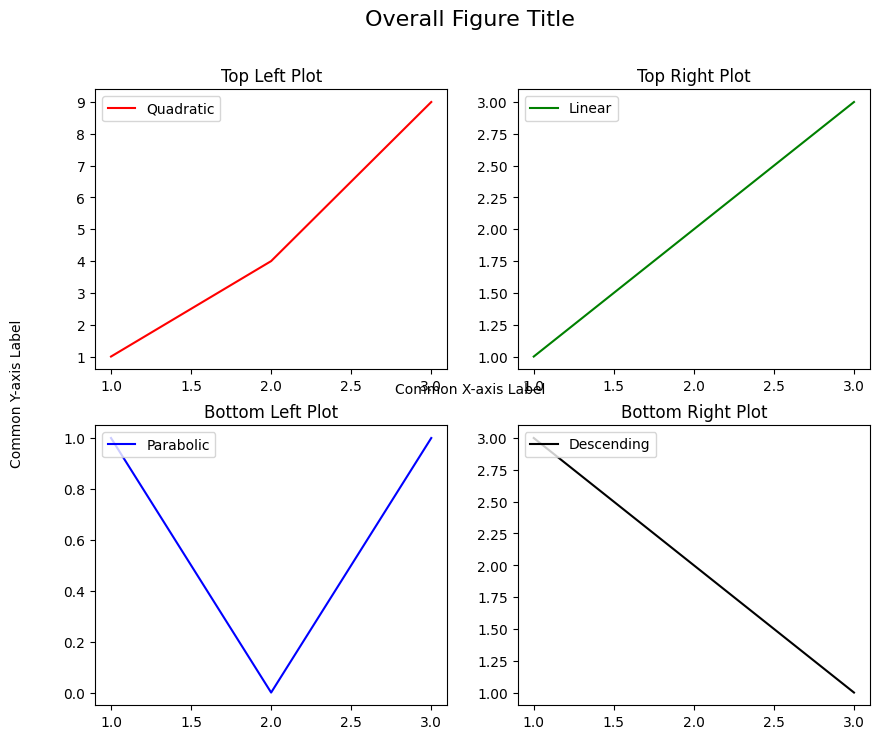

In [63]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Adding data and a legend to each Axes individually
axs[0, 0].plot([1, 2, 3], [1, 4, 9], label='Quadratic', color='r')
axs[0, 0].set_title('Top Left Plot')
axs[0, 0].legend(loc='upper left')

axs[0, 1].plot([1, 2, 3], [1, 2, 3], label='Linear', color='g')
axs[0, 1].set_title('Top Right Plot')
axs[0, 1].legend(loc='upper left')

axs[1, 0].plot([1, 2, 3], [1, 0, 1], label='Parabolic', color='b')
axs[1, 0].set_title('Bottom Left Plot')
axs[1, 0].legend(loc='upper left')

axs[1, 1].plot([1, 2, 3], [3, 2, 1], label='Descending', color='k')
axs[1, 1].set_title('Bottom Right Plot')
axs[1, 1].legend(loc='upper left')

# Adding an overall title and a single legend for the whole figure
fig.suptitle('Overall Figure Title', fontsize=16)
#fig.legend(['Quadratic', 'Linear', 'Parabolic', 'Descending'], loc='upper center', ncol=4)

# Adding a common x-axis and y-axis label for all subplots
fig.text(0.5, 0.5, 'Common X-axis Label', ha='center')
fig.text(0.04, 0.5, 'Common Y-axis Label', va='center', rotation='vertical')

plt.show()

